In [1]:
using Distributions
using Plots; gr()

Plots.GRBackend()

In [2]:
using Random

In [3]:
Random.seed!(2022)

TaskLocalRNG()

In [4]:
exp_10 = rand(Exponential(10), 10)
exp_1 = rand(Exponential(1), 10)
exp_01 = rand(Exponential(0.1), 10)
bern_10 = rand(Bernoulli(), 10)

10-element Vector{Bool}:
 1
 1
 0
 1
 1
 0
 0
 1
 0
 1

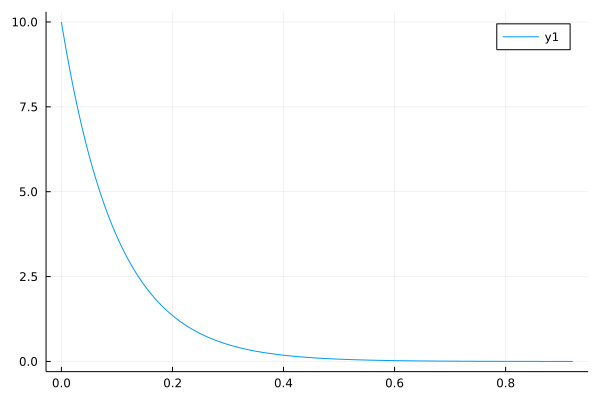

In [24]:
plot(Exponential(1/10))

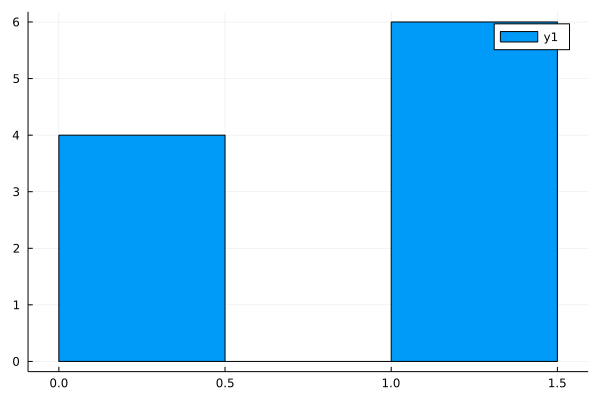

In [5]:
histogram(bern_10)

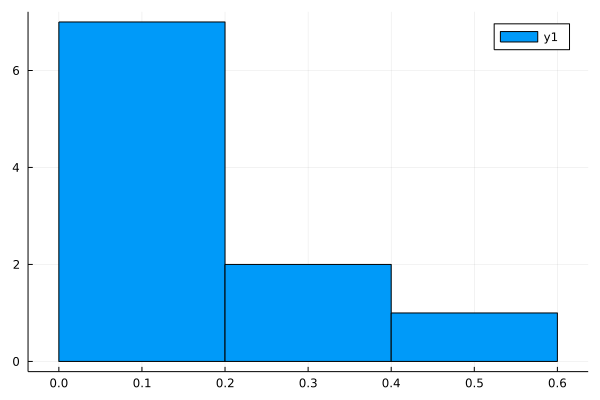

In [6]:
histogram(exp_01)

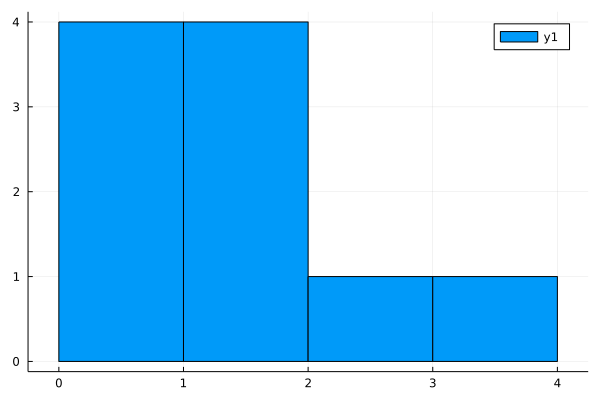

In [7]:
histogram(exp_1)

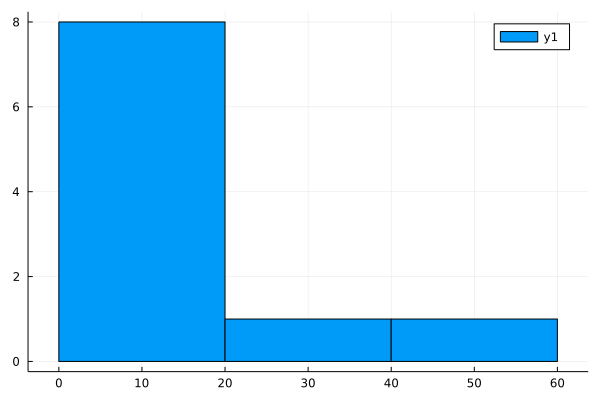

In [8]:
histogram(exp_10)

In [9]:
using StatsPlots

In [10]:
n = 10
sexp_10 = sum(exp_10)
sexp_1 = sum(exp_1)
sexp_01 = sum(exp_01)
sbern_10 = sum(bern_10)

6

In [21]:
exp_10

10-element Vector{Float64}:
  0.6615592241365932
 20.128426565164446
 16.17267704057846
 49.84501638004113
  6.138461736345773
 17.981594656150065
  3.4464472271369444
 13.541319062349997
  1.1661756572323536
  2.4643143492442974

In [22]:
1/mean(exp_10)

0.07601903984824601

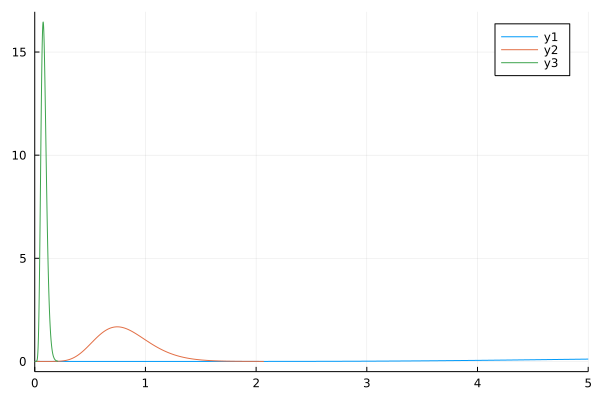

In [37]:
post_01L = Gamma(1 + n, (sexp_01)^-1)
plot(post_01L, xlim= (0, 5))
post_1L = Gamma(1 + n, (sexp_1)^-1)
plot!(post_1L)
post_10L = Gamma(1 + n, (sexp_10)^-1)
plot!(post_10L)

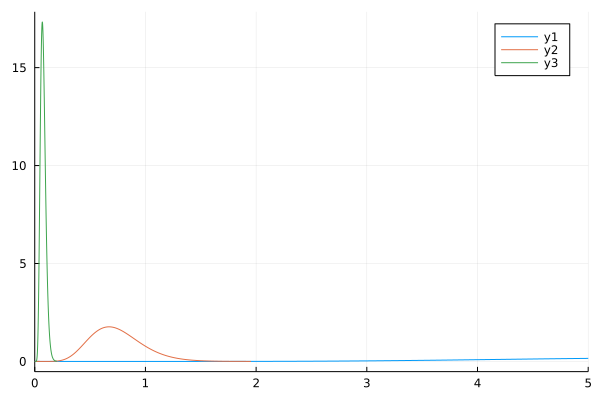

In [38]:
post_01J = Gamma(n, (sexp_01)^-1)
plot(post_01J,  xlim= (0, 5))
post_1J = Gamma(n, (sexp_1)^-1)
plot!(post_1J)
post_10J = Gamma(n, (sexp_10)^-1)
plot!(post_10J)

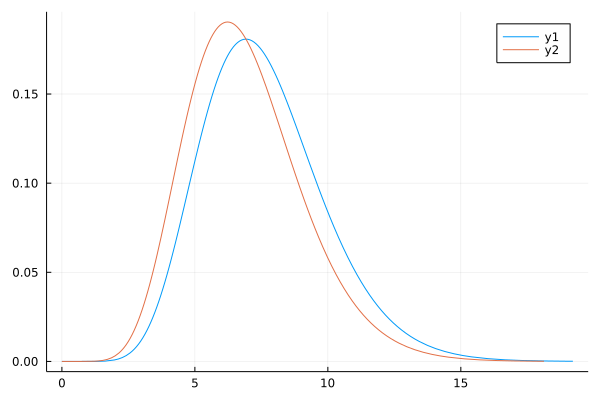

In [39]:
plot(post_01L)
plot!(post_01J)

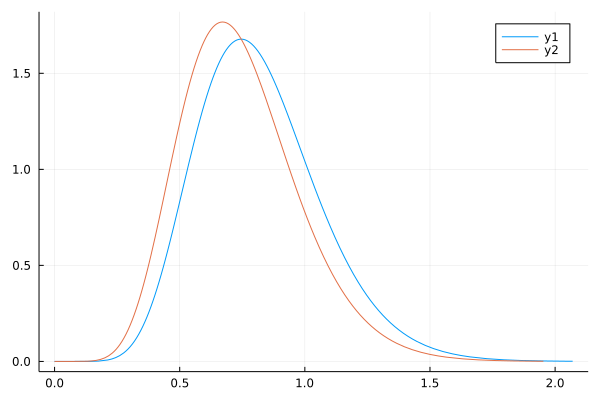

In [40]:
plot(post_1L)
plot!(post_1J)

In [43]:
1/mean(exp_1)

0.7456341017940563

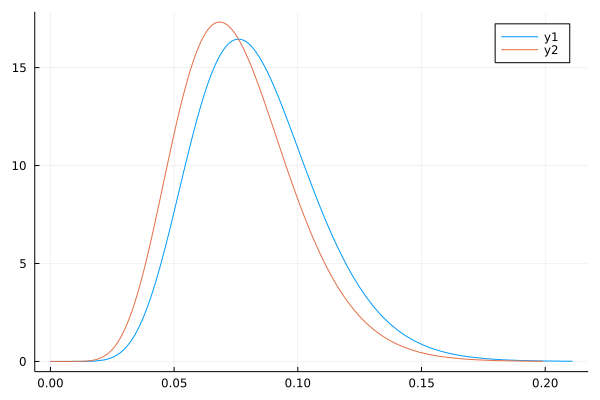

In [44]:
plot(post_10L)
plot!(post_10J)

In [46]:
1/mean(exp_10)

0.07601903984824601

In [26]:
exp_01

10-element Vector{Float64}:
 0.0744818993530403
 0.22371285599127086
 0.03320422576805443
 0.1562098922861246
 0.0179744816639659
 0.09446637835634185
 0.41352938751307966
 0.290626008395603
 0.017859093788843258
 0.12295712776864752

In [30]:
1/mean(exp_01)

6.920312972452429

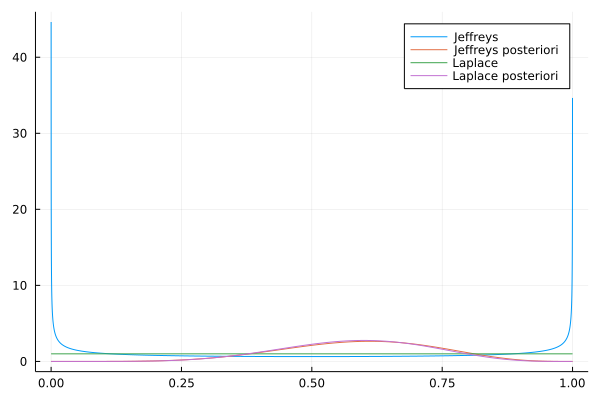

In [13]:
priori_1 = Beta(1/2, 1/2)
plot(priori_1, label="Jeffreys")
post_1 = Beta(1/2 + sbern_10, 1/2 + n - sbern_10)
plot!(post_1, label="Jeffreys posteriori")
priori_2 = Beta(1, 1)
plot!(priori_2, label="Laplace")
post_2 = Beta(1 + sbern_10, 1 + n - sbern_10)
plot!(post_2, label="Laplace posteriori")

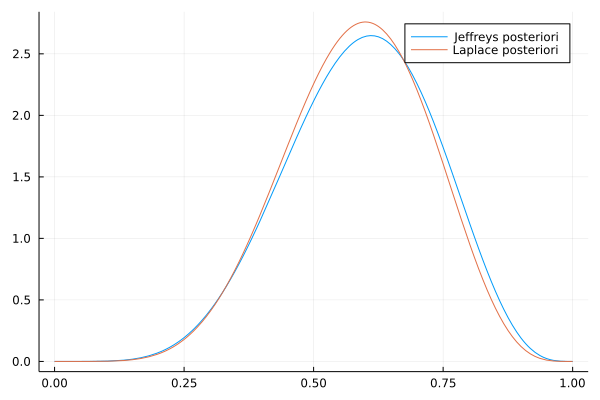

In [20]:
plot(post_1, label="Jeffreys posteriori")
plot!(post_2, label="Laplace posteriori")

In [14]:
Distribuicoes = [post_01L, post_1L, post_10L, post_01J, post_1J, post_10J, priori_1, post_1, priori_2, post_2]

10-element Vector{Distribution{Univariate, Continuous}}:
 Gamma{Float64}(α=11.0, θ=0.40899438347974004)
 Gamma{Float64}(α=11.0, θ=0.06938949295412615)
 Gamma{Float64}(α=11.0, θ=0.007544551032268686)
 Gamma{Float64}(α=10.0, θ=0.40899438347974004)
 Gamma{Float64}(α=10.0, θ=0.06938949295412615)
 Gamma{Float64}(α=10.0, θ=0.007544551032268686)
 Beta{Float64}(α=0.5, β=0.5)
 Beta{Float64}(α=6.5, β=4.5)
 Beta{Float64}(α=1.0, β=1.0)
 Beta{Float64}(α=7.0, β=5.0)

In [15]:
Medias = [mean(i) for i in Distribuicoes]
Variancias = [var(i) for i in Distribuicoes]

10-element Vector{Float64}:
 1.840040462897699
 0.05296391905673795
 0.0006261227530635715
 1.6727640571797264
 0.04814901732430723
 0.000569202502785065
 0.125
 0.020144628099173553
 0.08333333333333333
 0.018696581196581196

In [16]:
using DataFrames

In [17]:
df = DataFrame(Medias = Medias, Variancias = Variancias)

,Medias,Variancias
,Float64,Float64
1,4.49894,1.84004
2,0.763284,0.0529639
3,0.0829901,0.000626123
4,4.08994,1.67276
5,0.693895,0.048149
6,0.0754455,0.000569203
7,0.5,0.125
8,0.590909,0.0201446
9,0.5,0.0833333
